**Install packages**

In [1]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
# !git clone https://github.com/maudl3116/CondSigKME.git

In [2]:
%cd CondSigKME

/content/CondSigKME


In [ ]:
# !pip install -r requirements.txt

In [ ]:
# !pip install git+https://github.com/maudl3116/sigkernel.git

**Generate one dataset**

In [3]:
%cd options_utils

/content/CondSigKME/options_utils


In [ ]:
# !pip install --no-cache-dir -e .


> **Generate reference prices**



In [ ]:
# !python optimal_stopping/run/run_algo.py --configs=config1_prices --nb_jobs=2;


> **Generate the sample paths**



In [ ]:
# !python optimal_stopping/run/generate_paths.py --configs=config1_paths --nb_jobs=2;

**Or load existing dataset**

In [4]:
df_ = pd.read_csv('output/metrics_draft/config1_prices.csv')
df = df_[['hurst','price']]
prices = df.groupby('hurst', as_index=False)['price'].mean()
paths  = pickle.load(open('output/metrics_draft/config1_paths.obj','rb'))

**Run one toy experiment**

In [5]:
%cd ../src

/content/CondSigKME/src


In [6]:
from KES import model

In [21]:
sub = 2
M = 500
alphas0 = [1.]
alphas1 = [20]
lambdas = [1.]
#0.01,0.5,1.,5.,10.,20.
paths_sub = [p[:M,:5,:] for p in paths[::sub]]
scores,_, results, ind_train, ind_test, model_ = model(paths_sub, prices['price'].to_numpy()[::sub],rank=1, alphas0=alphas0,alphas1=alphas1,lambdas=lambdas,at=True,ll=None,cv=3, mode='krr',imbalanced=True)

100%|██████████| 1/1 [00:02<00:00,  2.28s/it]

best scaling parameter (cv on the train set):  (1.0, 20, 1.0)
best mse score (cv on the train set):  0.010430496832010387


In [22]:
y_pred_train = model_.predict(ind_train)
y_pred_test = model_.predict(ind_test)

In [23]:
scores

0.14098497512241337

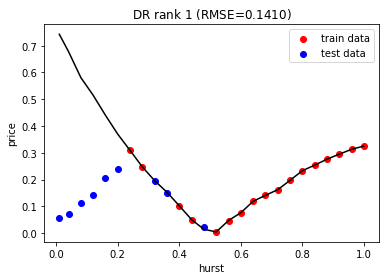

In [24]:
import matplotlib.pyplot as plt
plt.scatter(prices['hurst'].to_numpy()[::sub][ind_train],y_pred_train,color='r', label='train data')
plt.scatter(prices['hurst'].to_numpy()[::sub][ind_test],y_pred_test,color='b', label='test data')
plt.plot(prices['hurst'].to_numpy()[::sub],prices['price'].to_numpy()[::sub],color='k', label='')
plt.xlabel('hurst')
plt.ylabel('price')
plt.legend()
plt.title(r'DR rank $1$ (RMSE=%0.004f)'%scores)
# plt.savefig('DR_rank0.pdf')
plt.show()

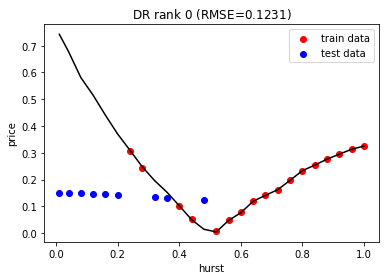

In [15]:
import matplotlib.pyplot as plt
plt.scatter(prices['hurst'].to_numpy()[::sub][ind_train],y_pred_train,color='r', label='train data')
plt.scatter(prices['hurst'].to_numpy()[::sub][ind_test],y_pred_test,color='b', label='test data')
plt.plot(prices['hurst'].to_numpy()[::sub],prices['price'].to_numpy()[::sub],color='k', label='')
plt.xlabel('hurst')
plt.ylabel('price')
plt.legend()
plt.title(r'DR rank $0$ (RMSE=%0.004f)'%scores)
# plt.savefig('DR_rank0.pdf')
plt.show()